In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import itertools
from tensorflow.keras.models import load_model
import random
from tensorflow.keras.preprocessing import image
from matplotlib import interactive
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import matplotlib.image as mpimg


img_width, img_height = 150, 150

train_data_dir = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/train"
validation_data_dir = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/validation"
nb_train_samples = 753
nb_validation_samples = 201
epochs = 20
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
    

model = Sequential()
model.add(Conv2D(24, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
    

loss='categorical_crossentropy'



model.compile(loss=loss,
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)




print(model.summary())
model.save('Covid_Phenomena_Testing_20.model')

Found 753 images belonging to 3 classes.
Found 201 images belonging to 3 classes.
Epoch 1/20
47/47 [==============================] - 26s 553ms/step - loss: 1.1349 - accuracy: 0.3813 - val_loss: 1.0280 - val_accuracy: 0.3750
Epoch 2/20
47/47 [==============================] - 27s 571ms/step - loss: 0.9749 - accuracy: 0.5577 - val_loss: 1.1647 - val_accuracy: 0.6458
Epoch 3/20
47/47 [==============================] - 27s 566ms/step - loss: 0.7175 - accuracy: 0.7088 - val_loss: 0.3643 - val_accuracy: 0.8802
Epoch 4/20
47/47 [==============================] - 26s 548ms/step - loss: 0.5107 - accuracy: 0.8089 - val_loss: 0.3108 - val_accuracy: 0.8646
Epoch 5/20
47/47 [==============================] - 26s 550ms/step - loss: 0.3883 - accuracy: 0.8440 - val_loss: 0.1457 - val_accuracy: 0.9583
Epoch 6/20
47/47 [==============================] - 26s 555ms/step - loss: 0.3624 - accuracy: 0.8847 - val_loss: 0.2108 - val_accuracy: 0.9219
Epoch 7/20
47/47 [==============================] - 26s 557m

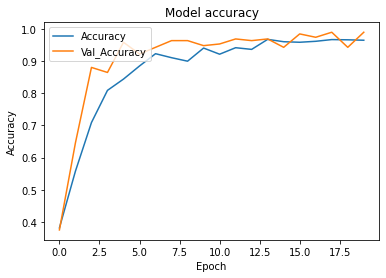

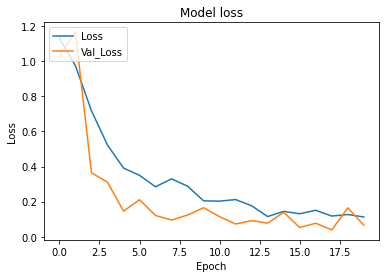

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()